# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Load the data into a dataframe

In [2]:
df = pd.read_csv(r"C:\Users\akpla\Downloads\archive (7)\Historical Product Demand.csv")

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


# Data Understanding

In [4]:
df.shape

(1048575, 5)

In [5]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [6]:
df.Product_Code.unique()

array(['Product_0993', 'Product_0979', 'Product_1159', ...,
       'Product_0237', 'Product_0644', 'Product_0853'], dtype=object)

In [7]:
df.Warehouse.unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

In [8]:
df.Product_Category.nunique()

33

There are 33 unique products in this dataset stored in 4 different warehouses

# Data Cleaning

In [9]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [10]:
'''Define a function "check_order_demand" to check if the Order_demand 
column has an integer data type or not.The function uses the "try-except" block
to attempt to convert the value to an integer, and returns "True" if successful.
We will use this function to filter out any non-integer values in the Order_demand 
column using the pandas "apply" method.'''

def check_order_demand(x):
    try:
        int(x)
    except:
        return False
    return True
#Check where Order_demand is not an integer
df[~df.Order_Demand.apply(lambda x: check_order_demand(x))].head(6)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
112290,Product_2169,Whse_A,Category_024,2012/8/9,(1)
112307,Product_2132,Whse_A,Category_009,2012/11/1,(24)
112308,Product_2144,Whse_A,Category_009,2012/11/1,(24)
112356,Product_2118,Whse_A,Category_009,2012/3/7,(50)
112357,Product_2120,Whse_A,Category_009,2012/3/7,(100)
112360,Product_1794,Whse_A,Category_024,2012/6/28,(1)


In [11]:
# Convert the Order_demand to an Integer
def change_to_int(x):
    try:
        return int(x)
    except:
        return int(x[1:-1])
check = '(10)'
change_to_int(check)

10

In [12]:
df.Order_Demand = df.Order_Demand.apply(lambda x: change_to_int(x) )

In [13]:
df.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [14]:
# Rename the columns
df = df.rename(columns = {'Product_Code': 'Code',
                    'Product_Category':'Category',
                    'Order_Demand':'Demand'})
df.head()

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [15]:
# Check for missing data
df.isna().sum()

Code             0
Warehouse        0
Category         0
Date         11239
Demand           0
dtype: int64

In [16]:
100 * df.isna().sum()[3]/ df.shape[0]

1.0718355863910545

In [17]:
# 1% of the data has missing value so we can drop all the na
df = df.dropna()
df.isna().sum()

Code         0
Warehouse    0
Category     0
Date         0
Demand       0
dtype: int64

In [18]:
# Check the length of time the data was collected
df.Date.min(), df.Date.max()

('2011/1/8', '2017/1/9')

The data was collected from January 8th, 2011 to January 9th, 2017

In [19]:
df.Date.sort_values().unique()[:10]

array(['2011/1/8', '2011/10/20', '2011/10/31', '2011/11/18', '2011/11/21',
       '2011/11/22', '2011/11/23', '2011/11/24', '2011/11/25',
       '2011/11/28'], dtype=object)

In [20]:
# Set index to Date and Variable
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

#  Dealing with  irregularly sampled datasets.

There are few techniques we can use to deal with irregulary samples datasets
- Interpolate the time series data i.e. predict what those missing data by assuming that data samples behave monotonically
  at each interval. this assumption doesn’t hold then it may lead to many artifacts or misleading results.
- Resample the data, we may lose some data

# Univariate Analysis

<AxesSubplot:xlabel='Warehouse', ylabel='count'>

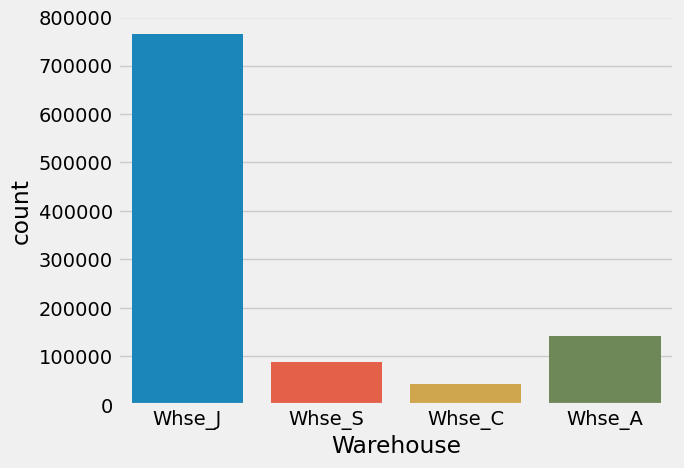

In [21]:
# Find the aggregate demand among the warehouses
sns.countplot(x = 'Warehouse', data = df)

This bar plot compares the count the numbers of orders by warehouses. Warehouses Whse_J has significantly more orders than the other warehouses with nearly 750,000 orders followed by Whse_A, then Whse_S and Whse_C

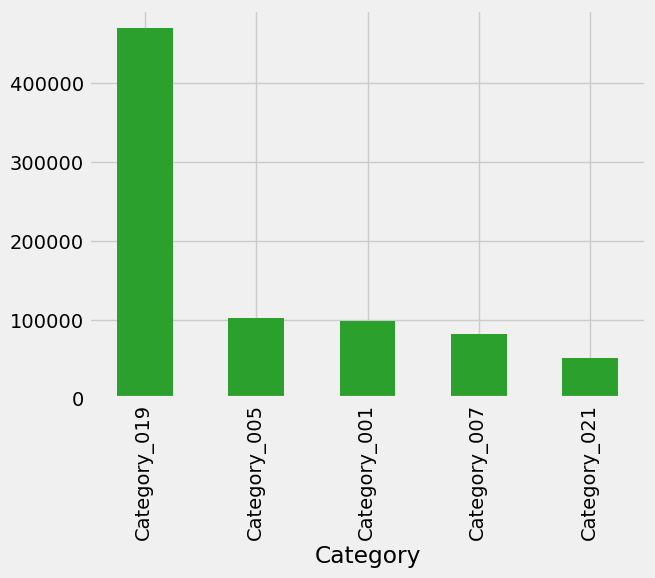

In [22]:
# Plot the 5 most popular category
df.Category.value_counts().head(5).plot(kind = 'bar', color = color_pal[2])
plt.xlabel('Category')
plt.show()

As shown on this plot, Category 019 ships by far the most orders in the product category 

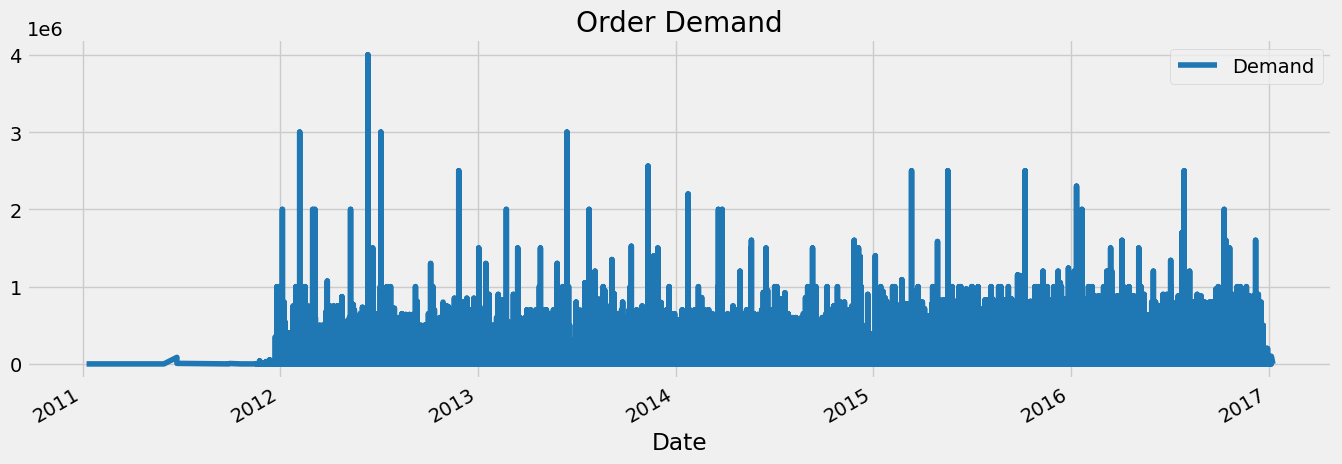

In [23]:
# Find the distribution of the demand
df.plot(kind = 'line',figsize=(15, 5),color = color_pal[0], title = 'Order Demand' )
plt.show()

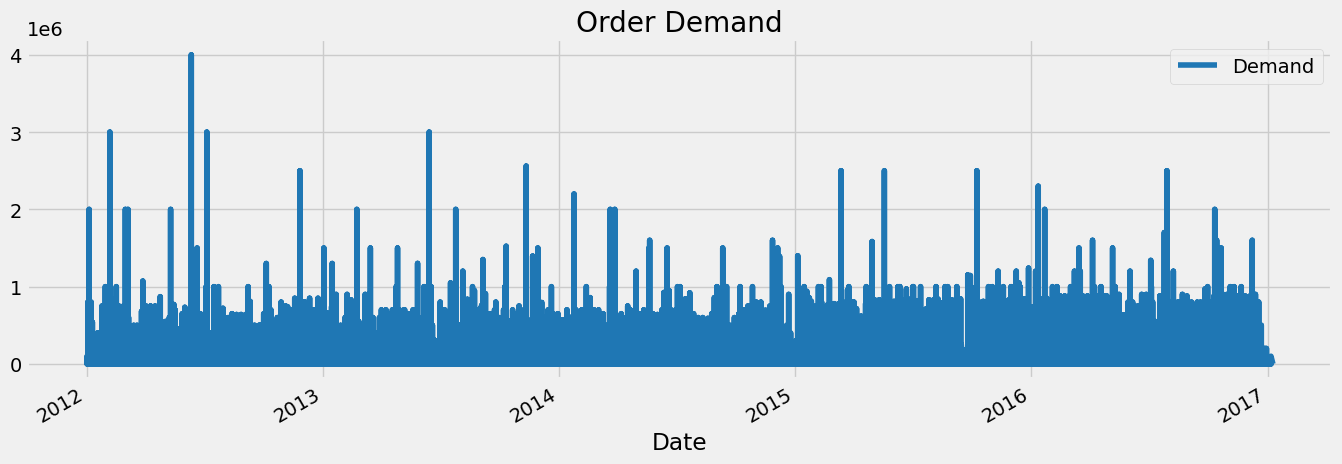

In [24]:
#This data have a lot of missing data before January 1st, 2012 
df_new = df.loc[df.index >= '01-01-2012']
df_new.plot(kind = 'line',figsize=(15, 5),color = color_pal[0], title = 'Order Demand' )
plt.show()

In [25]:
# Find the skewness in the data
df.Demand.skew()

31.432925049321977

# Bivariate Analysis/ Multivariate Analysis

In [26]:
# Total Demand by Warehouse
warehouse_Demand = df.groupby('Warehouse')['Demand'].sum()
warehouse_Demand

Warehouse
Whse_A     147877431
Whse_C     585071404
Whse_J    3363200396
Whse_S    1038024700
Name: Demand, dtype: int64

<AxesSubplot:ylabel='Warehouse'>

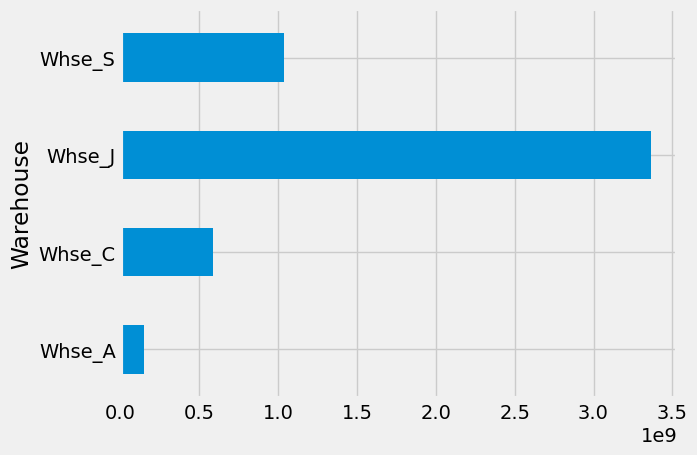

In [27]:
warehouse_Demand.plot(kind = 'barh', ylabel = 'Sum of the demand' )

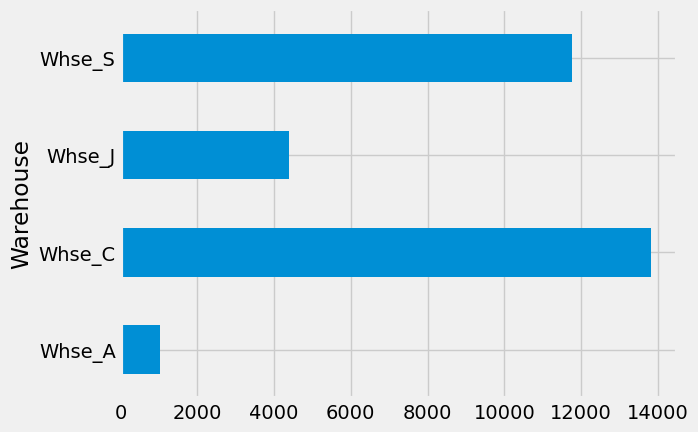

In [28]:
# Average Demand by Warehouse
df.groupby('Warehouse')['Demand'].mean().plot(kind = 'barh')
plt.show()

Although Warehouse Whse_J has the most orders, Whse_C and Whse_A shipped the most product per order on average. This can 
helpful when we want to reduce the cost of operation and shipping for instance.

In [29]:
df.head()

,Code,Warehouse,Category,Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


# Feature Engineering

In [30]:
" Function that create time series features using the index columns"
def create_feature(dataframe):
    dataframe = dataframe.copy()
    dataframe['day_of_the_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['Week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df = create_feature(df_new)
df.dtypes

Code               object
Warehouse          object
Category           object
Demand              int64
day_of_the_week     int64
Quarter             int64
Month               int64
Year                int64
Week                int32
dtype: object

In [31]:
# features, Target variable
Features = ['day_of_the_week', 'Quarter','Month', 'Year', 'Week']
target = ['Demand']

# Create our model using XGboost

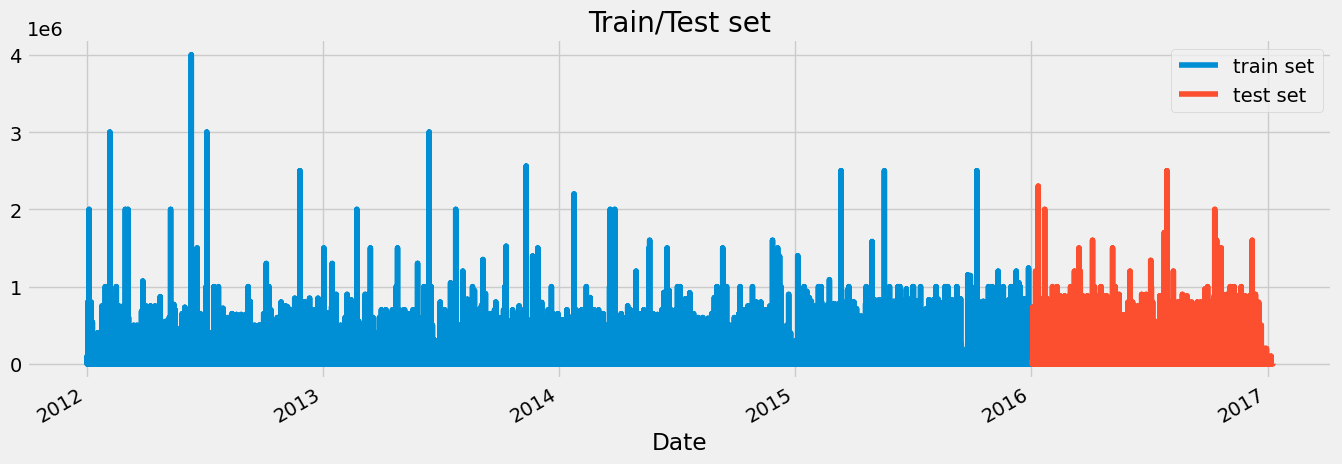

In [32]:
# Split the data in Train/ Test set
df_train = df.loc[df.index <= '2016-01-01'].copy()
df_test = df.loc[df.index > '2016-01-01'].copy()

#plot train/test
fig, ax = plt.subplots(figsize = (15,5))
df_train.Demand.plot(ax = ax, label = 'train set',legend = 'train set', title = 'Train/Test set')
df_test.Demand.plot(ax = ax, legend = 'train set', label = 'test set')
plt.show()

In [33]:
#Split the data into training set and testing set 
X_train = df_train[Features]
X_test = df_test[Features]

y_train = df_train[target]
y_test = df_test[target]

In [34]:
! pip install xgboost

In [35]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1000,
                    early_stopping_rounds = 50,
                    learning_rate = 0.01).fit(X_train, y_train,
                                                   eval_set = [(X_train,y_train), (X_test,y_test)],
                                                   verbose = 50)

[0]	validation_0-rmse:29022.32262	validation_1-rmse:31197.27223
[50]	validation_0-rmse:28751.26232	validation_1-rmse:30911.52767
[100]	validation_0-rmse:28649.88728	validation_1-rmse:30807.02889
[150]	validation_0-rmse:28610.22760	validation_1-rmse:30769.57990
[200]	validation_0-rmse:28594.02543	validation_1-rmse:30758.13683
[250]	validation_0-rmse:28586.47750	validation_1-rmse:30755.14559
[300]	validation_0-rmse:28582.88807	validation_1-rmse:30754.97119
[315]	validation_0-rmse:28582.07054	validation_1-rmse:30755.73220


- Model stopped after 315 trees because our validation rmse start to go up (overfitting)

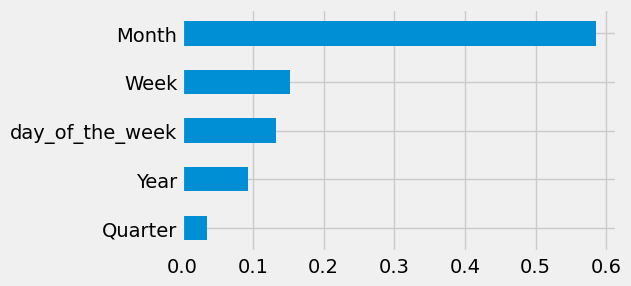

In [36]:
# Features Importance
fea_Imp = pd.DataFrame(model.feature_importances_, index = Features, columns = ['feature_importance'])
#plot the features importance
fea_Imp.feature_importance.sort_values().plot(kind = 'barh', figsize =(5,3))
plt.show()

# Forecast on Test

In [37]:
df_test['prediction'] = model.predict(X_test)

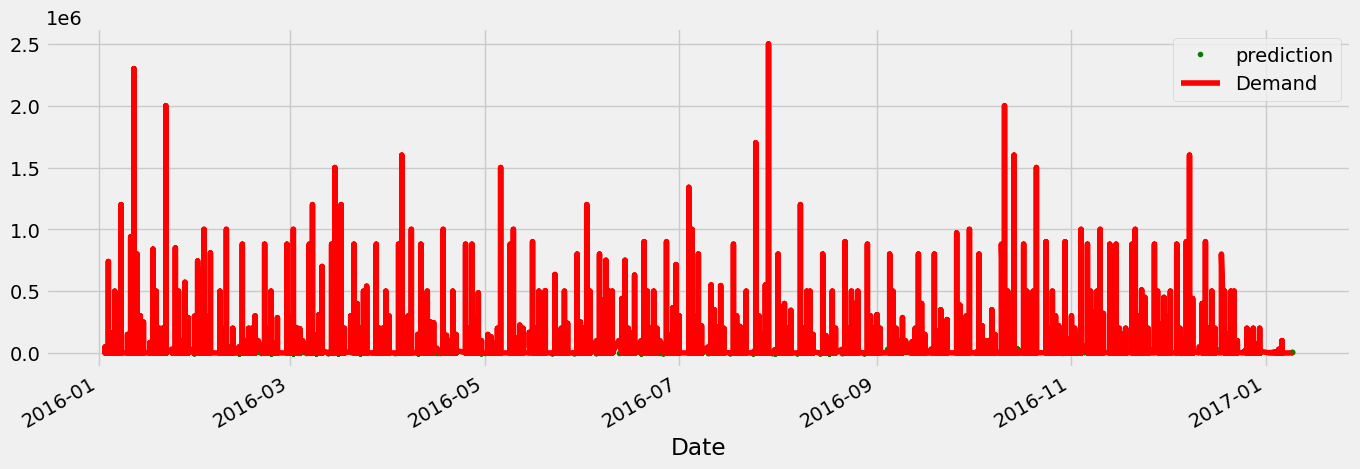

In [38]:
fig, ax = plt.subplots( figsize = (15,5))
df_test.prediction.plot(ax = ax, color = 'g', style = '.', legend = 'Prediction')
df_test.Demand.plot(ax = ax, color = 'r', legend = 'Testing')
plt.show()

We barely can see the prediction, XGboost did really bad at capturing the trend and seasonlity in the data. Let's use 
a more robust machine learning technique

# Time Series Analysis

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. 
In time series analysis, analysts record data points at consistent intervals over a set period of time rather than
just recording the data points intermittently or randomly.

# Visualise Features/ Target Relationship

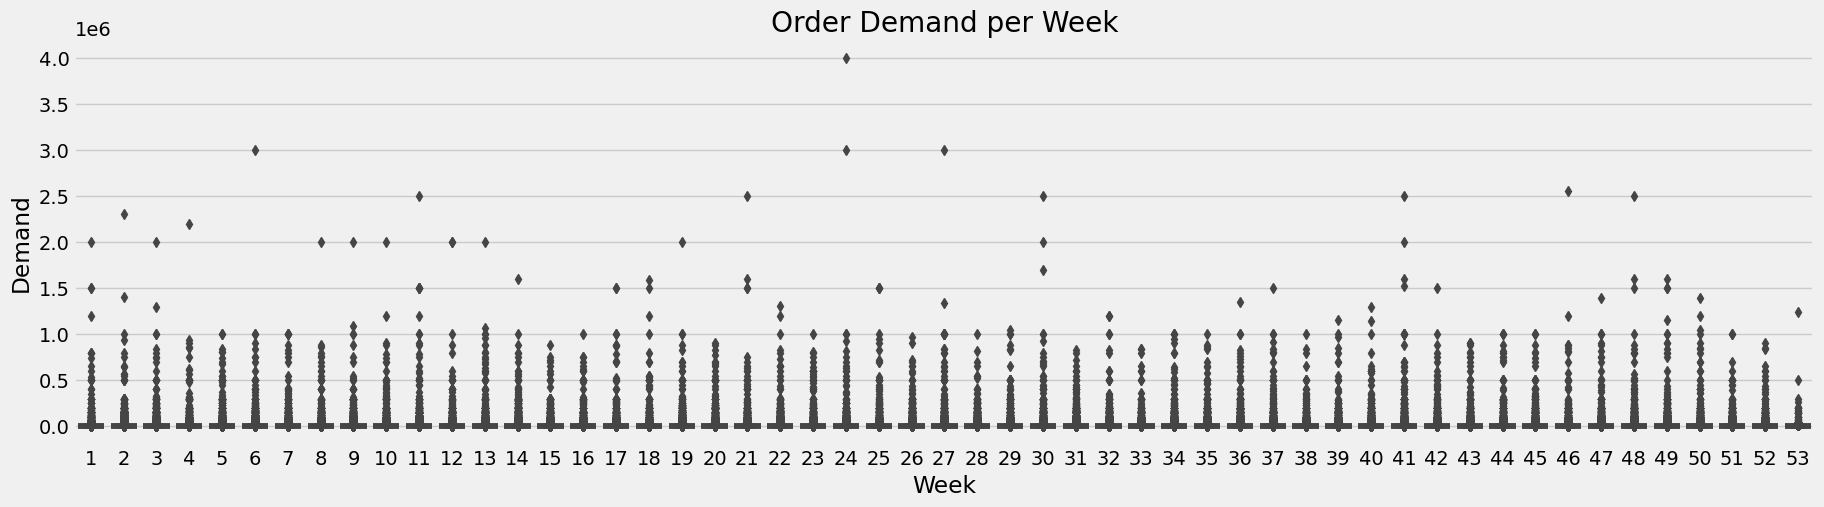

In [39]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='Week', y='Demand')
ax.set_title('Order Demand per Week')
plt.show()

In this data, there are lots of same data values. So, I will collect them together as weekly.

In [40]:
# Resample data as Weekly 
df_week = df.resample('W').mean()

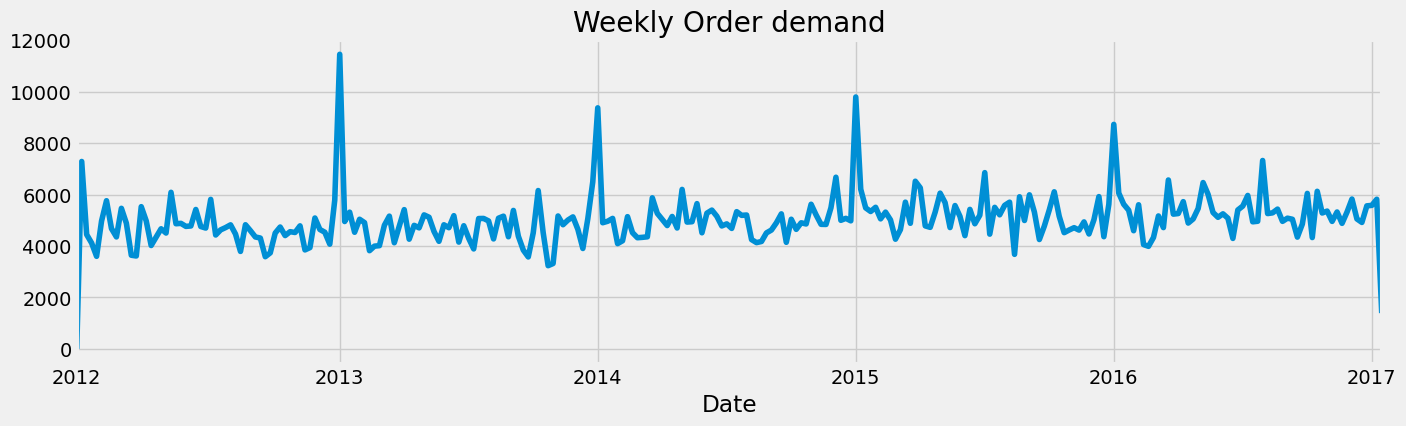

In [41]:
df_week['Demand'].plot(figsize = (15,4), title = 'Weekly Order demand')
plt.show()

- These data show a seasonal pattern. The pattern repeats every 12 months. The demand increase in December(probably due to the holiday season) and decrease probably in January.
- I can see a pattern in the weekly order demand, Let's explore the monthly pattern by sampling the data monthly

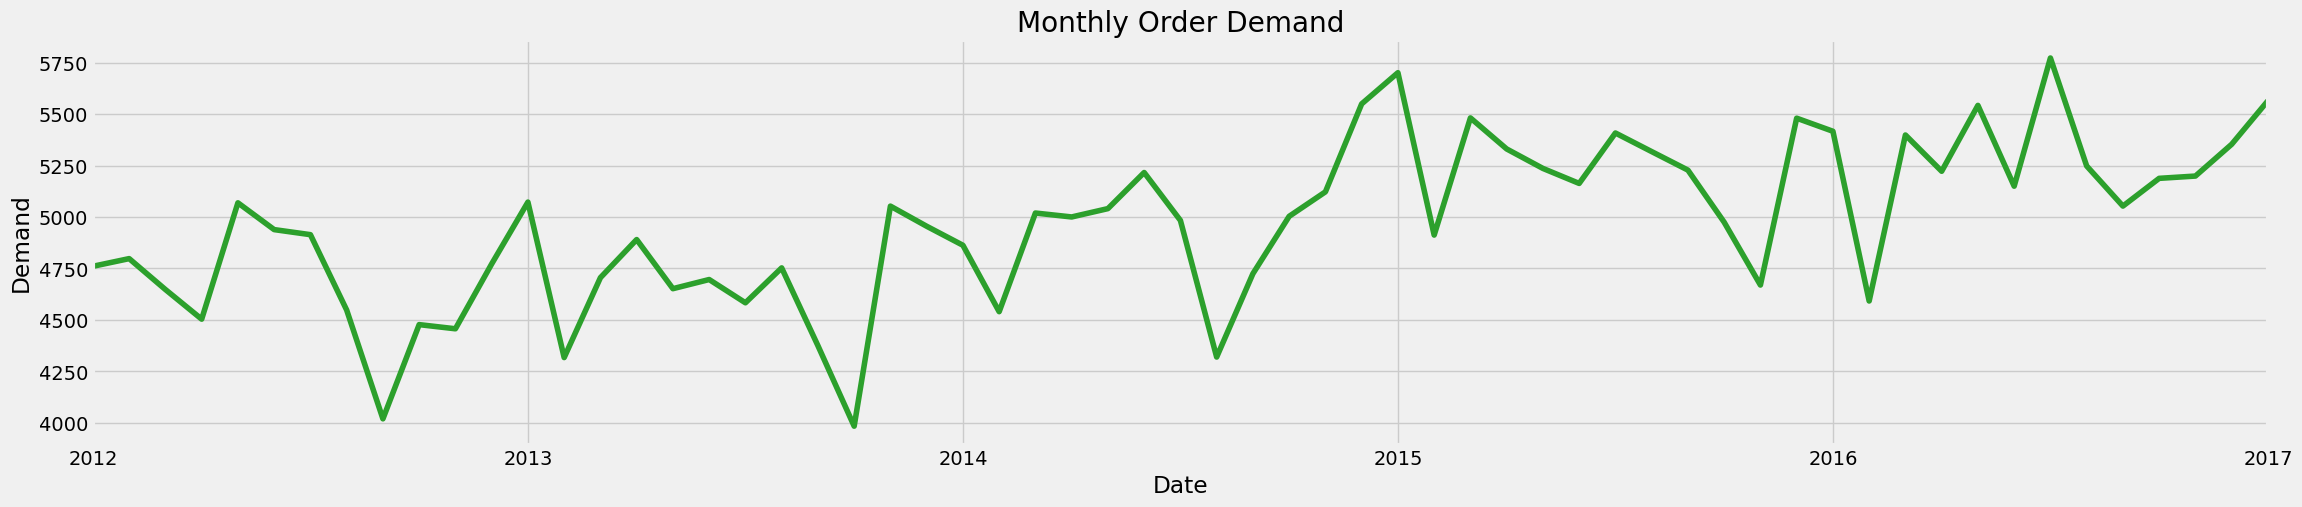

In [42]:
df_month = df.resample('MS').mean()
df_month.Demand.plot(figsize = (25,5), title = 'Monthly Order Demand', color = color_pal[2])
plt.ylabel('Demand')
plt.show()

This plot shows a clear upward trend from the last quarter of 2013 to the beginning of 2017... 

# Decomposition  to check the seasonality, trends and residuals.

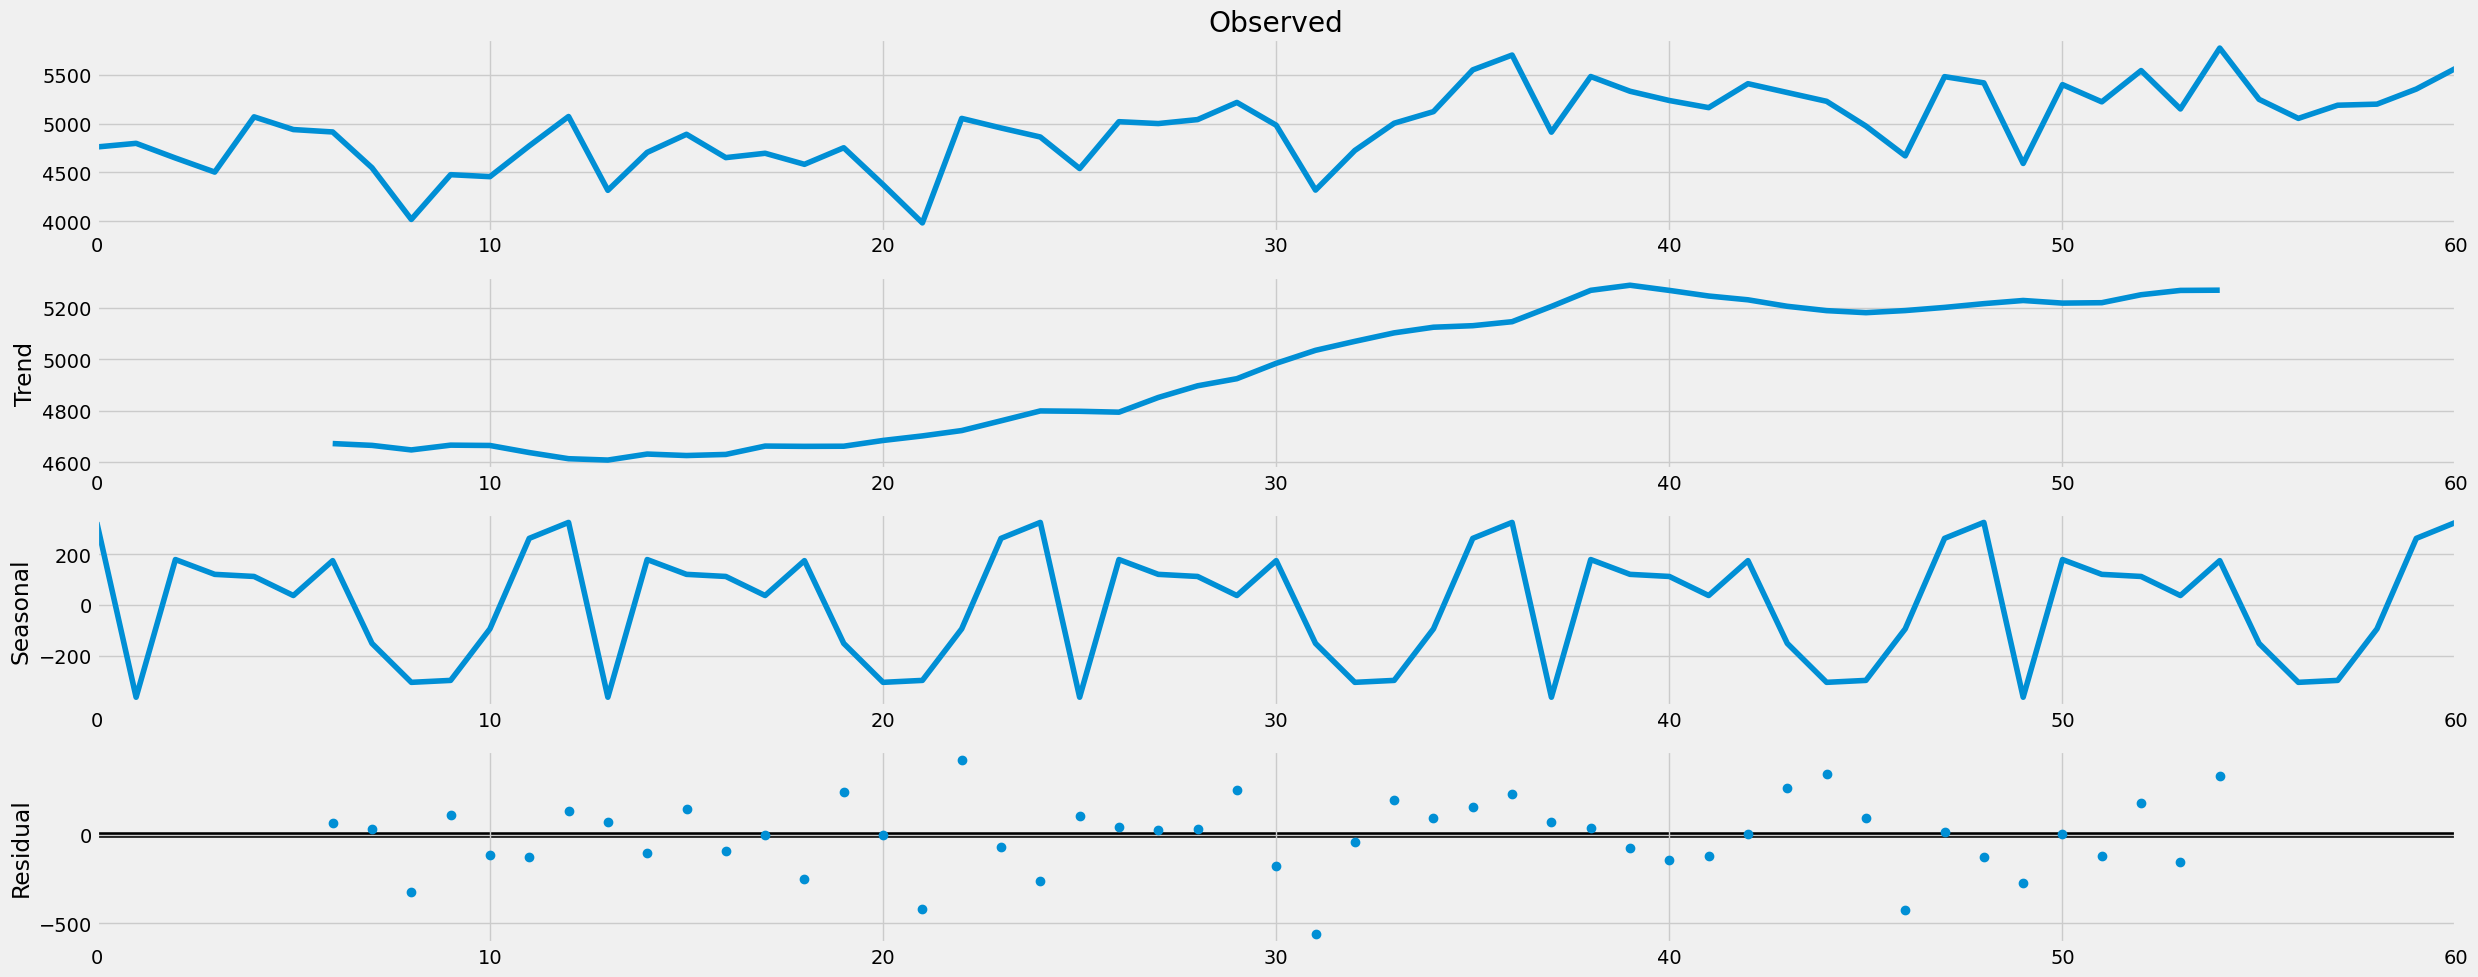

In [43]:
#Seasonal decomposition using moving averages
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 25, 10
decomposition = seasonal_decompose(df_month.Demand.values, model='additive', period = 12)
                   
fig = decomposition.plot()
plt.show()

# Visually, the time series is non-stationary but I will perform the Augmented Dickey- Adfuller test (ADF) to make sure of that

In [44]:
# import stats libraries
from statsmodels.tsa.stattools import adfuller
adfuller(df_month['Demand'])

(-2.135356249153704,
 0.23053730809929251,
 2,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 714.3239865088048)

- The p-value is obtained is greater than significance level of 0.05 
- Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

# Make Series Stationnary

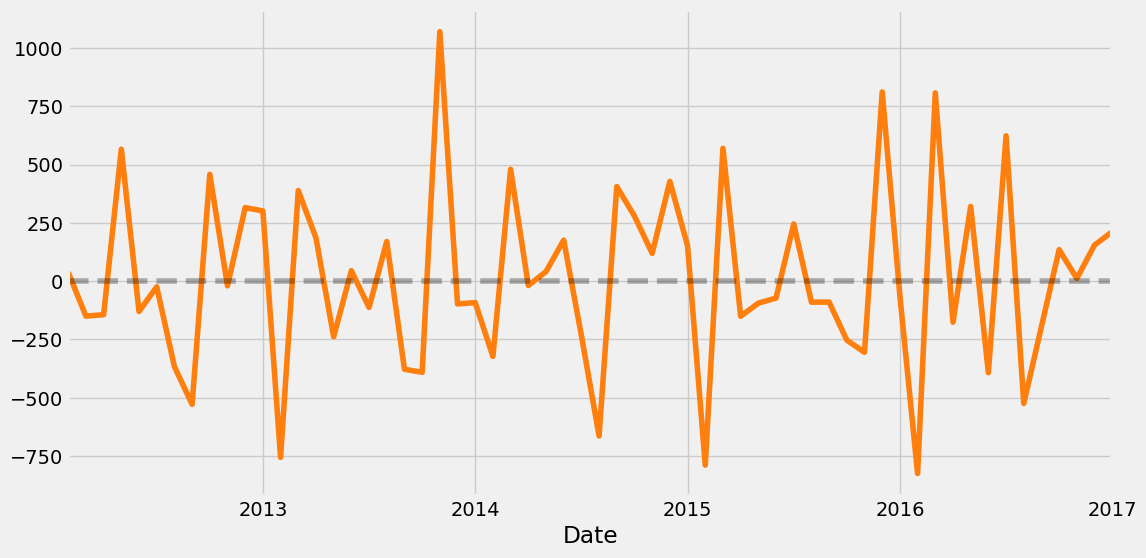

In [45]:
# Take First Difference to Remove Trend
df_diff = df_month.Demand.diff()[1:]
df_diff.plot(figsize=(12,6), color = color_pal[1])
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [46]:
# Augmented Dicker Fuller Test to check if this new series is stationnary after differentiation
adfuller(df_diff)

(-6.758687705873296,
 2.8284296959133446e-09,
 2,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 700.6632081217224)

The p-value is less than 0.05 so data series is stationnary

# Build ARIMA Model

- ARIMA models are generally denoted as ARIMA (p,d,q) where:
    - p is the order of autoregressive model (Forecasts future behavior based on past behavior data)
    - d is the degree of differencing(Integrating or eleminate trend in the data)
    - and q is the order of moving-average model(Past errors to predict the future)
- ARIMA models use differencing to convert a non-stationary time series into a stationary one,
    and then predict future values from historical data.
- Ways to determine p,q,d:
    - Using ACF And PCAF plots to find p,q and d is how many times we differenciate the data
    - Auto_Arima function tries different orders and determine the best model based on AIC criteria(lowest AIC)
    - For Loop

### 1) ACF and PACF plots and Interpretation

In [47]:
# Import libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

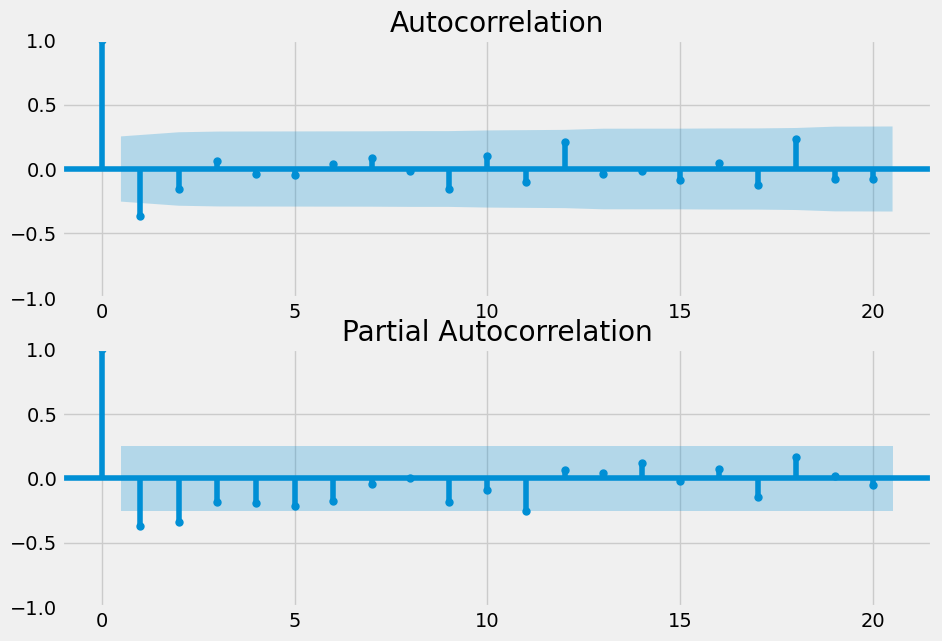

In [48]:
# plot ACF
fig = plt.figure(figsize = (10,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_diff, lags = 20, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_diff, lags = 20, method='ywm', ax = ax2)
plt.show()

Based on the AutoCorrelation chart:
- Lag 1 is strong(cross the Confidence Interval) so the order of q  is 1
- Based on the Partial AutoCorrelation chart, Lag 1 and 2 are strong(cross the Confidence Interval) so the order of p is 2
- I differentiate only once to make the series stationnary so d is 1

### 2) Train / Test split

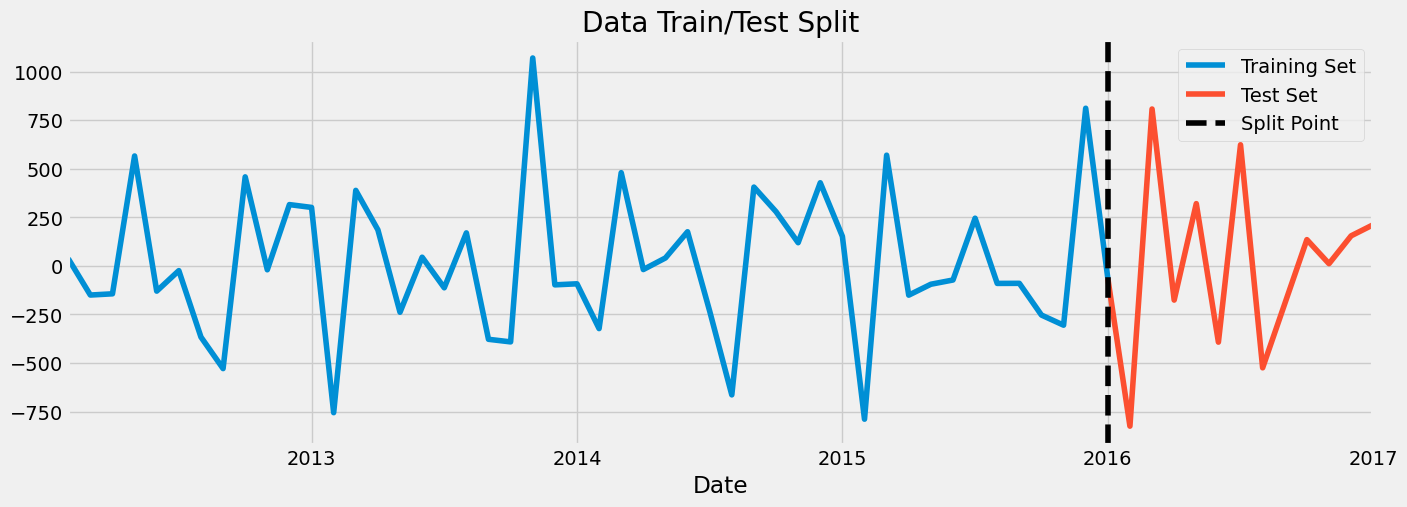

In [49]:
from datetime import datetime
from datetime import timedelta
train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

df_train = df_diff[:train_end]
df_test = df_diff[train_end:test_end]

# plot train and test dataset on the same graph
fig, ax = plt.subplots(figsize=(15, 5))
df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set','Split Point'])
plt.show()

### 3) Import Libraries and fit the model

In [50]:
# Fit the model
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df_train, order = (2,1,1)).fit()

In [51]:
# summary of the model
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -343.242
Date:                Wed, 22 Mar 2023   AIC                            694.484
Time:                        09:49:52   BIC                            701.885
Sample:                    02-01-2012   HQIC                           697.269
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3710      0.168     -2.211      0.027      -0.700      -0.042
ar.L2         -0.3259      0.184     -1.768      0.077      -0.687       0.035
ma.L1         -0.9999      0.252     -3.964      0.0

    Based on the summary:
    - The values of the coefficients for AR lag1, lag2 and MA lag1 are negatives which indicates that the time series 
    current period is negatively correlated with the time series at those lags
    -The p values for AR lag 1 and MA lag 1, sigma2 are significants because it is below 0.05

In [52]:
# get the predictions start and end dates
pred_start = df_test.index[0]
pred_end= df_test.index[-1]

# Make predictions
prediction = model_arima.predict(start = pred_start, end = pred_end)

# Get the residuals
residuals = df_test - prediction

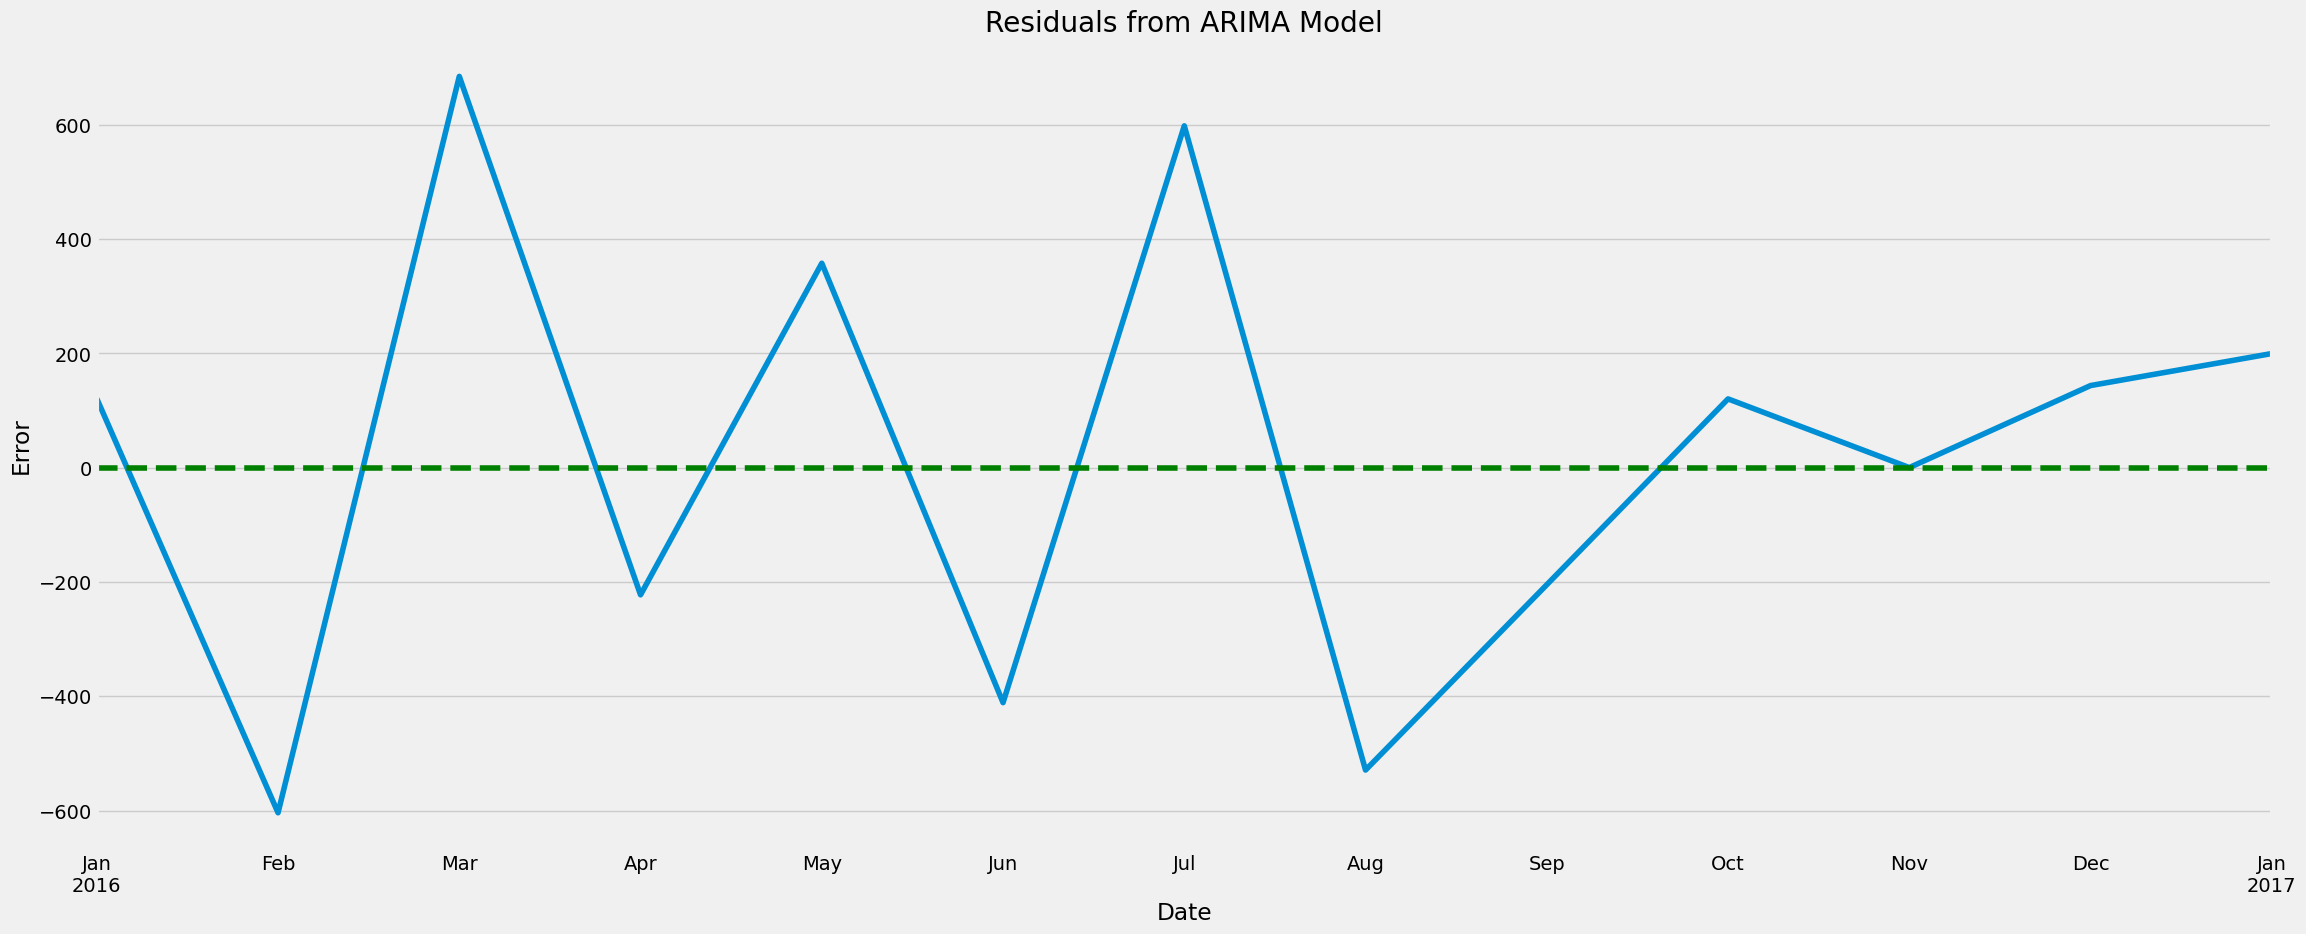

In [53]:
# Plot the residuals
residuals.plot(kind = 'line', title = 'Residuals from ARIMA Model')
plt.axhline(0,color ='g', linestyle = '--')
plt.ylabel('Error')
plt.show()

In [54]:
# Get the Root Mean Square Error
rmse = np.sqrt(np.mean(residuals**2))

In [55]:
rmse

387.30403376935305

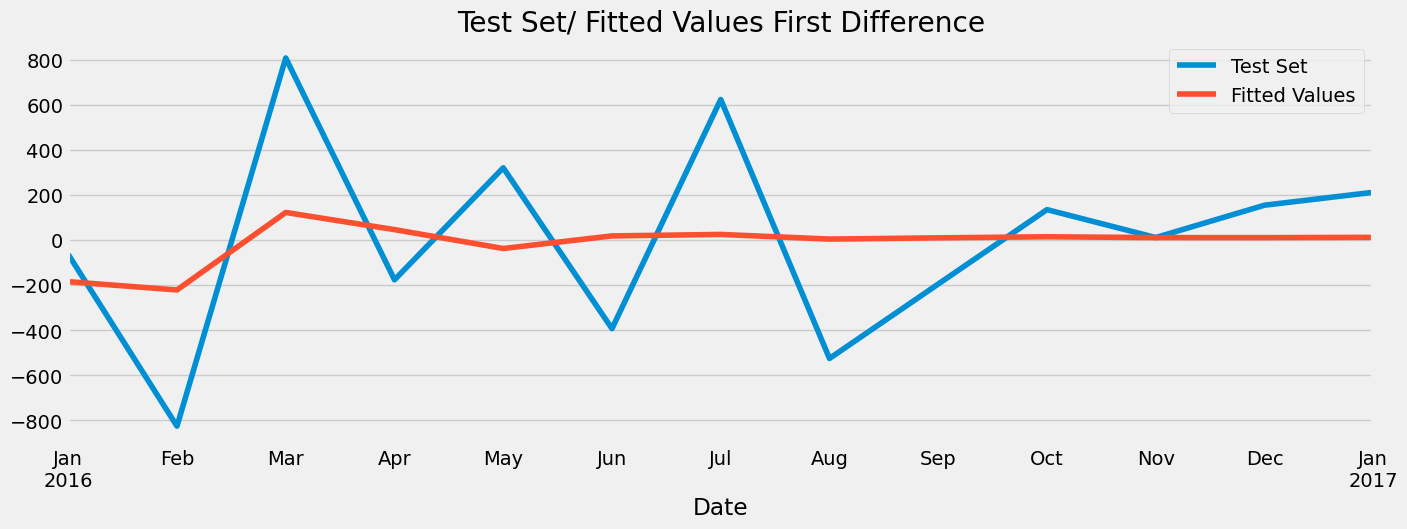

In [56]:
# Plot the train set against the predicted values
fig, ax = plt.subplots(figsize=(15, 5))
df_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
prediction.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

# Sarima model to capture seasonality

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima =SARIMAX(df_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
print(model_sarima.summary().tables[1])
pred = model_sarima.predict(start = pred_start, end = pred_end)

C:\Users\akpla\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2929      0.232     -1.263      0.207      -0.748       0.162
ma.L1         -1.0000      9.961     -0.100      0.920     -20.523      18.523
ar.S.L12      -0.0811      0.380     -0.213      0.831      -0.826       0.664
ma.S.L12      -1.0503      9.499     -0.111      0.912     -19.668      17.568
sigma2      8.553e+04      0.000   6.89e+08      0.000    8.55e+04    8.55e+04


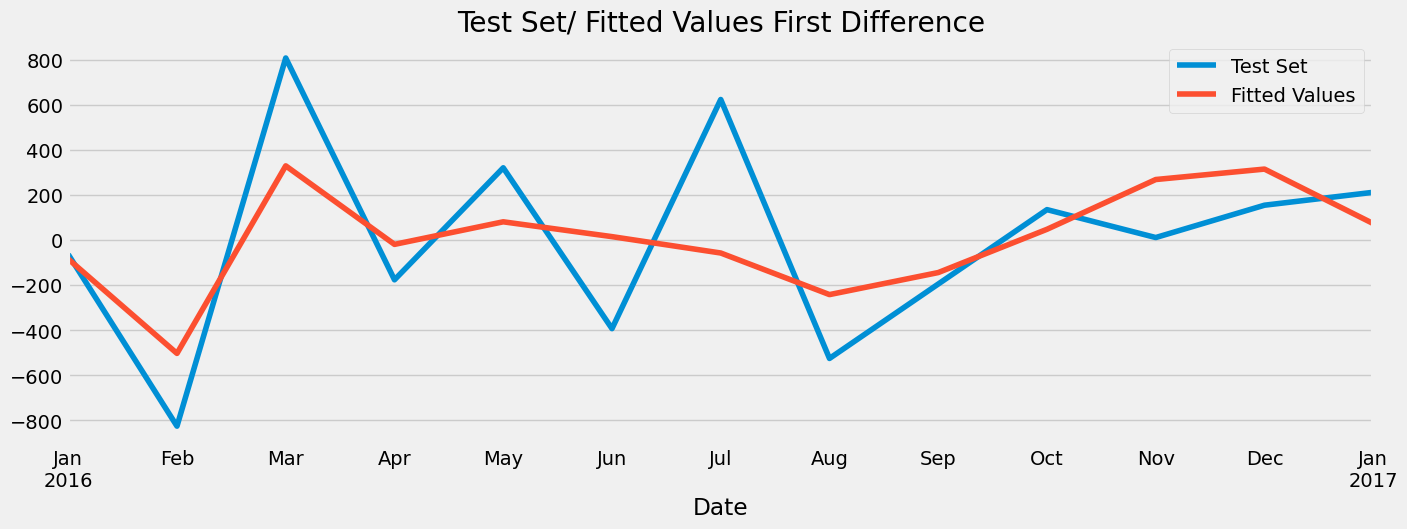

In [58]:
fig, ax = plt.subplots(figsize=(15, 5))
df_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
pred.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

In [59]:
# Root Mean Square
res = df_test - pred
rmse = np.sqrt(np.mean(res**2))
rmse

309.61973971465056

# Taking Results back to original scale

#### I took the first differencing to transform the time series to a stationnary series. To reverse than, I can use the numpy.cumsum()

In [60]:
# Getting only the value of zeroth index since the diff() operation looses first value.
pred.iloc[0] = df_month.query('index == "2016-01-01"')['Demand']
#cumsum Return cumulative sum over a DataFrame or Series axis
model_predicted = pred.cumsum()
model_predicted.head()

2016-01-01    5416.990630
2016-02-01    4914.334305
2016-03-01    5243.311576
2016-04-01    5224.125933
2016-05-01    5304.983694
Freq: MS, Name: predicted_mean, dtype: float64

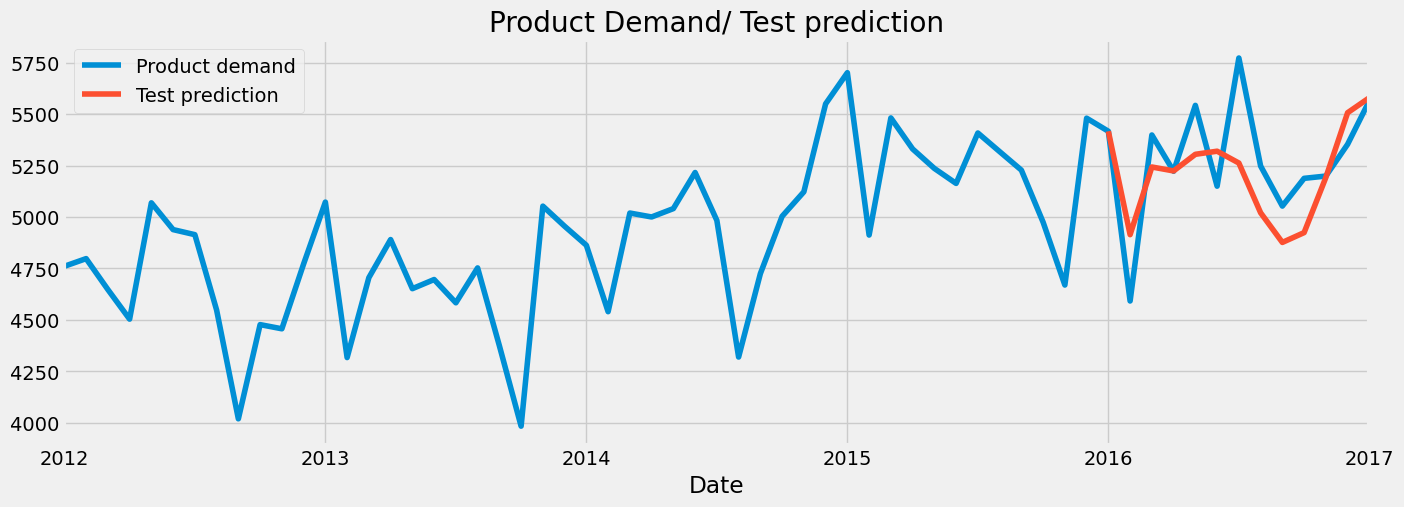

In [61]:
# Plot the actual data set and the actual predicted values
fig, ax = plt.subplots(figsize=(15, 5))
df_month.Demand.plot(ax=ax, label='Product Demand', title='Product Demand/ Test prediction')
model_predicted.plot(ax=ax, label='Test prediction')
ax.legend(['Product demand', 'Test prediction'])
plt.show()

# Future Prediction

In [62]:
# predict Demand for the next 3 months
future = model_sarima.predict(start = '2017-01-01', end = '2017-12-01')
# Getting only the value of zeroth index since the diff() operation looses first value.
future.iloc[0] = df_month.query('index == "2017-01-01"')['Demand']
#cumsum Return cumulative sum over a DataFrame or Series axis
future = future.cumsum()

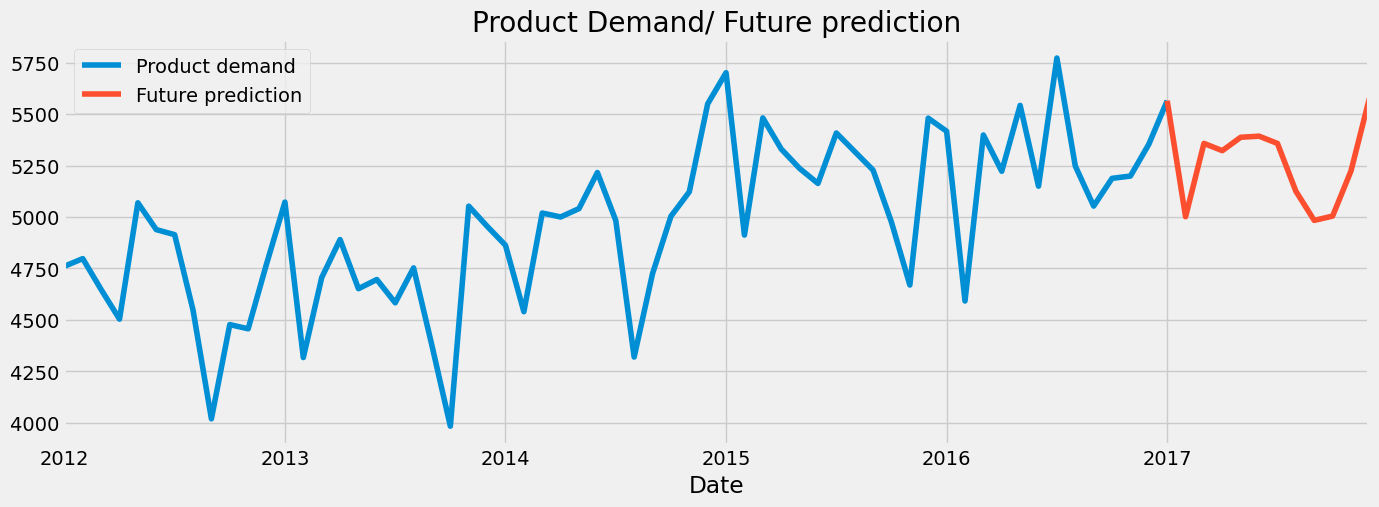

In [63]:
fig, ax = plt.subplots(figsize=(15, 5))
df_month.Demand.plot(ax=ax, label='Product Demand', title='Product Demand/ Future prediction')
future.plot(ax=ax, label='Future')
ax.legend(['Product demand', 'Future prediction'])
plt.show()

# Export the model for future prediction

In [64]:
# Import pickle
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model_sarima, open(filename, 'wb'))